# EDA

In [1]:
import os
import numpy as np 
import pandas as pd 
from scipy import stats 

import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
train = pd.read_csv('hw1_train.csv',index_col=[0])
train.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,204700
2,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,102500
3,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,177000
4,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,237400
5,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183600


In [3]:
test = pd.read_csv('hw1_test.csv',index_col=[0])
test.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
Id,,,,,,,,,,,,,,,,,,,,,
2001,30,RM,90.0,8100,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdWo,NaN,0,6,2007,COD,Normal
2002,70,RM,60.0,10800,Pave,Grvl,Reg,Bnk,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
2003,50,RM,52.0,9439,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal
2004,20,RM,52.0,8626,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2005,80,RM,76.0,11800,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1 to 2000
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2000 non-null   int64  
 1   MS Zoning        2000 non-null   object 
 2   Lot Frontage     1656 non-null   float64
 3   Lot Area         2000 non-null   int64  
 4   Street           2000 non-null   object 
 5   Alley            143 non-null    object 
 6   Lot Shape        2000 non-null   object 
 7   Land Contour     2000 non-null   object 
 8   Utilities        2000 non-null   object 
 9   Lot Config       2000 non-null   object 
 10  Land Slope       2000 non-null   object 
 11  Neighborhood     2000 non-null   object 
 12  Condition 1      2000 non-null   object 
 13  Condition 2      2000 non-null   object 
 14  Bldg Type        2000 non-null   object 
 15  House Style      2000 non-null   object 
 16  Overall Qual     2000 non-null   int64  
 17  Overall Cond  

In [5]:
print('Train Data | Data Types')
print('Object: ', train.dtypes[train.dtypes==object].count())
print('Numeric: ',train.dtypes[train.dtypes!=object].count())
print('*'*20)
print('*'*20)
print('Test Data | Data Types:')
print('Object: ', test.dtypes[test.dtypes==object].count())
print('Numeric: ',test.dtypes[test.dtypes!=object].count())

Train Data | Data Types
Object:  43
Numeric:  37
********************
********************
Test Data | Data Types:
Object:  43
Numeric:  36


In [6]:
# these three variables are categorical data encoded
train[['MS SubClass', 'Overall Qual', 'Overall Cond']] = train[['MS SubClass', 'Overall Qual', 'Overall Cond']].astype('object')
test[['MS SubClass', 'Overall Qual', 'Overall Cond']] = test[['MS SubClass', 'Overall Qual', 'Overall Cond']].astype('object')

In [7]:
# 2. Data Cleaning ¶

In [8]:
train.duplicated().sum(), test.duplicated().sum()


(0, 2)

In [9]:
test.drop_duplicates(inplace=True)


In [10]:
test.duplicated().sum()


0

In [11]:
# Missing Data
print('Train Features | % missing data')
print('*'*30)
print(round(train.isna().sum()[train.isna().sum()!=0] / train.shape[0] *100, 2).sort_values(ascending=False))
print('\n'*2)
print('Test Features | % missing data')
print('*'*30)
round(test.isna().sum()[test.isna().sum()!=0] / test.shape[0] *100, 2).sort_values(ascending=False)

Train Features | % missing data
******************************
Pool QC           99.75
Misc Feature      95.90
Alley             92.85
Fence             80.80
Fireplace Qu      48.35
Lot Frontage      17.20
Garage Yr Blt      5.20
Garage Cond        5.20
Garage Qual        5.20
Garage Finish      5.20
Garage Type        5.15
Bsmt Exposure      2.75
BsmtFin Type 2     2.70
Bsmt Cond          2.65
BsmtFin Type 1     2.65
Bsmt Qual          2.65
Mas Vnr Type       0.85
Mas Vnr Area       0.85
Bsmt Half Bath     0.10
Bsmt Full Bath     0.10
Electrical         0.05
Bsmt Unf SF        0.05
BsmtFin SF 2       0.05
BsmtFin SF 1       0.05
Total Bsmt SF      0.05
dtype: float64



Test Features | % missing data
******************************


Pool QC           99.14
Misc Feature      97.41
Alley             94.18
Fence             79.74
Fireplace Qu      48.81
Lot Frontage      15.73
Garage Yr Blt      5.93
Garage Finish      5.93
Garage Qual        5.93
Garage Cond        5.93
Garage Type        5.82
Bsmt Exposure      3.02
BsmtFin Type 1     2.91
BsmtFin Type 2     2.91
Bsmt Cond          2.91
Bsmt Qual          2.91
Mas Vnr Area       0.65
Mas Vnr Type       0.65
Garage Cars        0.11
Garage Area        0.11
dtype: float64

In [12]:
a_train = (round(train.isna().sum()[train.isna().sum()!=0] / train.shape[0] *100, 2).sort_values(ascending=False))
b_test = (round(test.isna().sum()[test.isna().sum()!=0] / test.shape[0] *100, 2).sort_values(ascending=False))

a = (a_train.to_dict().copy())
b = (b_test.to_dict().copy())

for (feature,score) in a.items():
    print(feature,score)

Pool QC 99.75
Misc Feature 95.9
Alley 92.85
Fence 80.8
Fireplace Qu 48.35
Lot Frontage 17.2
Garage Yr Blt 5.2
Garage Cond 5.2
Garage Qual 5.2
Garage Finish 5.2
Garage Type 5.15
Bsmt Exposure 2.75
BsmtFin Type 2 2.7
Bsmt Cond 2.65
BsmtFin Type 1 2.65
Bsmt Qual 2.65
Mas Vnr Type 0.85
Mas Vnr Area 0.85
Bsmt Half Bath 0.1
Bsmt Full Bath 0.1
Electrical 0.05
Bsmt Unf SF 0.05
BsmtFin SF 2 0.05
BsmtFin SF 1 0.05
Total Bsmt SF 0.05


In [13]:
a_list = list(a.keys())
b_list = list(b.keys())

set1 = set(a_list)
set2 = set(b_list)

# Elements present in one of the sets but not both (symmetric difference)
result = list(set1.symmetric_difference(set2))
result

['BsmtFin SF 1',
 'Total Bsmt SF',
 'BsmtFin SF 2',
 'Electrical',
 'Garage Area',
 'Bsmt Unf SF',
 'Bsmt Half Bath',
 'Bsmt Full Bath',
 'Garage Cars']

In [14]:
len(np.unique(a_list +b_list))

27

In [15]:
# filling nan values of these columns with NA or 0 (Not Available) according to the data description

na_cat = ['Pool QC','Misc Feature','Alley','Fence','Fireplace Qu','Garage Cond','Garage Qual','Garage Finish',
           'Garage Type','Bsmt Cond','Bsmt Exposure','Bsmt Qual','BsmtFin Type 1','BsmtFin Type 2','Mas Vnr Type'
         ]
train[na_cat] = train[na_cat].fillna('NA')
test[na_cat] = test[na_cat].fillna('NA')

na_num = ['Garage Yr Blt','Bsmt Full Bath','Bsmt Half Bath','Garage Area','Garage Cars','Mas Vnr Area','Total Bsmt SF','Bsmt Unf SF',
           'BsmtFin SF 2','BsmtFin SF 1'
         ]

train[na_num] = train[na_num].fillna(0)
test[na_num] = test[na_num].fillna(0)


In [16]:
a_new = (round(train.isna().sum()[train.isna().sum()!=0] / train.shape[0] *100, 2).sort_values(ascending=False))
a_new = (a_new.to_dict())

print('Train Features | % missing data')
print('*'*30)
for (feature,score) in a_new.items():
    print(feature,score)
print("\n")
print('Test Features | % missing data')
print('*'*30)

b_new = (round(test.isna().sum()[test.isna().sum()!=0] / test.shape[0] *100, 2).sort_values(ascending=False))
b_new = (b_new.to_dict())
for (feature,score) in b_new.items():
    print(feature,score)

Train Features | % missing data
******************************
Lot Frontage 17.2
Electrical 0.05


Test Features | % missing data
******************************
Lot Frontage 15.73


In [17]:
# Categorical Features with a very low number of missing values will be replaced by the mode
train['Electrical'] = train['Electrical'].fillna("SBrkr") 

# Replaced all missing values in LotFrontage by imputing the median value of each neighborhood. 
train['Lot Frontage'] = train.groupby('Neighborhood')['Lot Frontage'].transform( lambda x: x.fillna(x.mean()))
test['Lot Frontage'] = test.groupby('Neighborhood')['Lot Frontage'].transform( lambda x: x.fillna(x.mean()))


In [18]:
a_new = (round(train.isna().sum()[train.isna().sum()!=0] / train.shape[0] *100, 2).sort_values(ascending=False))
a_new = (a_new.to_dict())

print('Train Features | % missing data')
print('*'*30)
for (feature,score) in a_new.items():
    print(feature,score)
print("\n")
print('Test Features | % missing data')
print('*'*30)

b_new = (round(test.isna().sum()[test.isna().sum()!=0] / test.shape[0] *100, 2).sort_values(ascending=False))
b_new = (b_new.to_dict())
for (feature,score) in b_new.items():
    print(feature,score)

Train Features | % missing data
******************************


Test Features | % missing data
******************************
Lot Frontage 0.32


In [19]:
# There are still some missing data, Let's check out the mean (or count) for each neighborhood.


In [20]:
test[test['Lot Frontage'].isna()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
Id,,,,,,,,,,,,,,,,,,,,,
2257,120,RM,NaN,9763,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,9,2007,WD,Normal
2789,160,RH,NaN,3612,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,0,NA,MnPrv,NA,0,6,2006,WD,Normal
2893,120,RM,NaN,8239,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,11,2006,WD,Normal


In [21]:

print('Neighborhood | Count of Lot Frontage')
print('*'*30)
print(test.groupby('Neighborhood')['Lot Frontage'].count().sort_values(ascending=False))
print("\n")
print('Neighborhood | Lot Frontage Mean')
print('*'*30)
print(test.groupby('Neighborhood')['Lot Frontage'].mean().sort_values(ascending=False))

Neighborhood | Count of Lot Frontage
******************************
Neighborhood
CollgCr    125
NAmes       99
Edwards     83
OldTown     64
Sawyer      62
Crawfor     54
Mitchel     51
IDOTRR      45
BrkSide     39
Gilbert     38
NridgHt     32
Timber      32
SawyerW     29
Somerst     28
NWAmes      25
ClearCr     19
MeadowV     18
SWISU       17
NoRidge     17
StoneBr     15
Blmngtn     11
BrDale       9
Greens       4
Veenker      4
NPkVill      3
Blueste      2
Landmrk      0
GrnHill      0
Name: Lot Frontage, dtype: int64


Neighborhood | Lot Frontage Mean
******************************
Neighborhood
ClearCr    99.333333
NoRidge    95.166667
NridgHt    87.200000
NWAmes     82.352941
Sawyer     80.675000
SawyerW    77.458333
Mitchel    77.414634
Gilbert    75.481481
Timber     75.291667
NAmes      74.976190
CollgCr    72.017857
Crawfor    69.488889
StoneBr    67.857143
Veenker    66.000000
Edwards    64.441558
Somerst    62.760000
OldTown    61.516129
IDOTRR     59.227273
SWISU    

In [22]:
# We fill  the remaining missing Data with 0
test['Lot Frontage'] = test['Lot Frontage'].fillna(0)


In [23]:
# Missing Data
print('Train Features | % missing data')
print('*'*30)
print(round(train.isna().sum()[train.isna().sum()!=0] / train.shape[0] *100, 2).sort_values(ascending=False))
print('\n'*2)
print('Test Features | % missing data')
print('*'*30)
round(test.isna().sum()[test.isna().sum()!=0] / test.shape[0] *100, 2).sort_values(ascending=False)

Train Features | % missing data
******************************
Series([], dtype: float64)



Test Features | % missing data
******************************


Series([], dtype: float64)

In [24]:
train.SalePrice.describe().to_frame()

,SalePrice
count,2000.000000
mean,182520.900000
std,81867.392154
min,13100.000000
25%,129775.000000
50%,162400.000000
75%,215625.000000
max,748000.000000


In [25]:
def targe_plot(target):
    fig, ax = plt.subplots(1, 3,figsize=(18,6), dpi=100)

    sns.histplot(x=target, data=train, kde=True, element="step", stat="density", ax=ax[0])

    ## Plotting the QQ_Plot. 
    stats.probplot(train.loc[:,target], plot = ax[1])

    sns.boxplot(x=target, data=train,  ax=ax[2])
    ax[0].set_title(f"Skewness: {train[target].skew()}  \n Kurtosis: {train[target].kurt()}", fontsize=14, )

    plt.suptitle(target, fontsize=18)
    fig.tight_layout()
    plt.show()

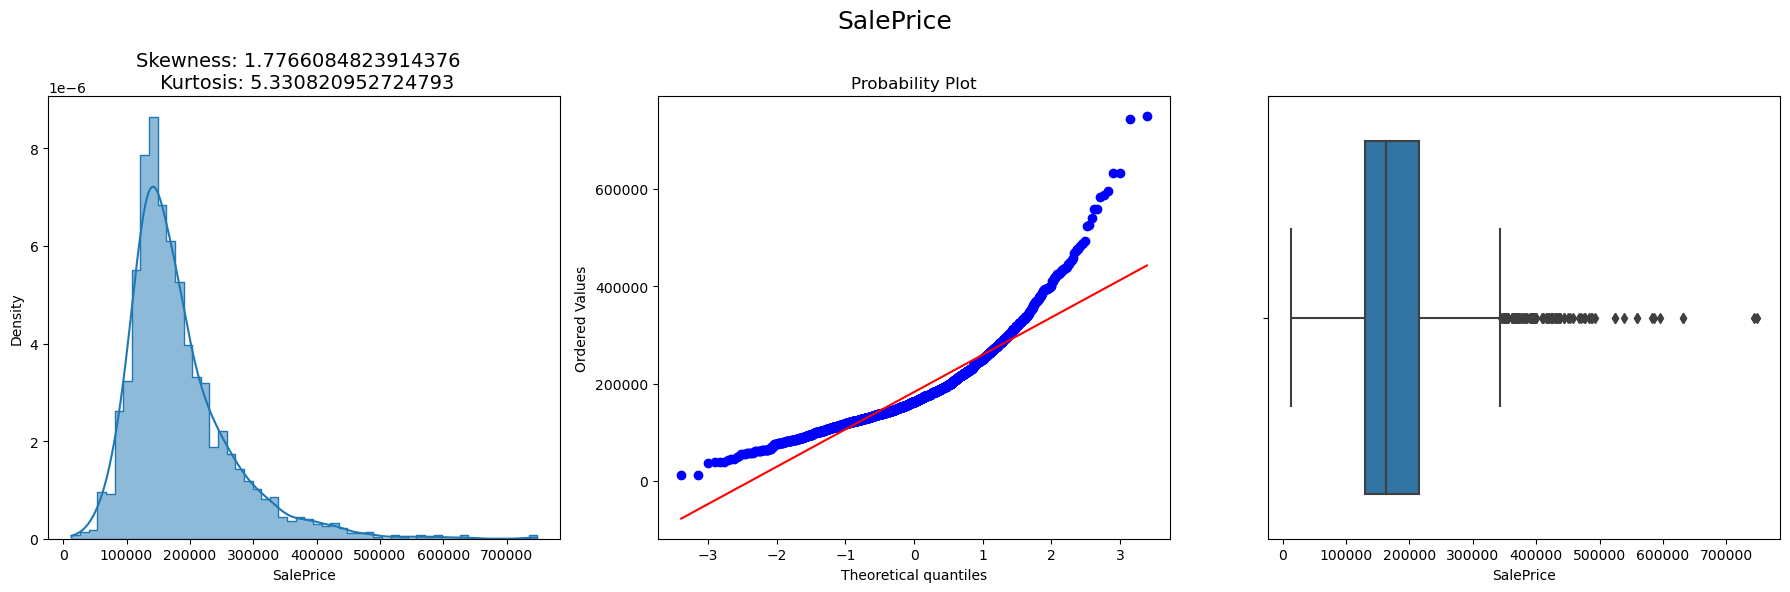

In [26]:
targe_plot('SalePrice')

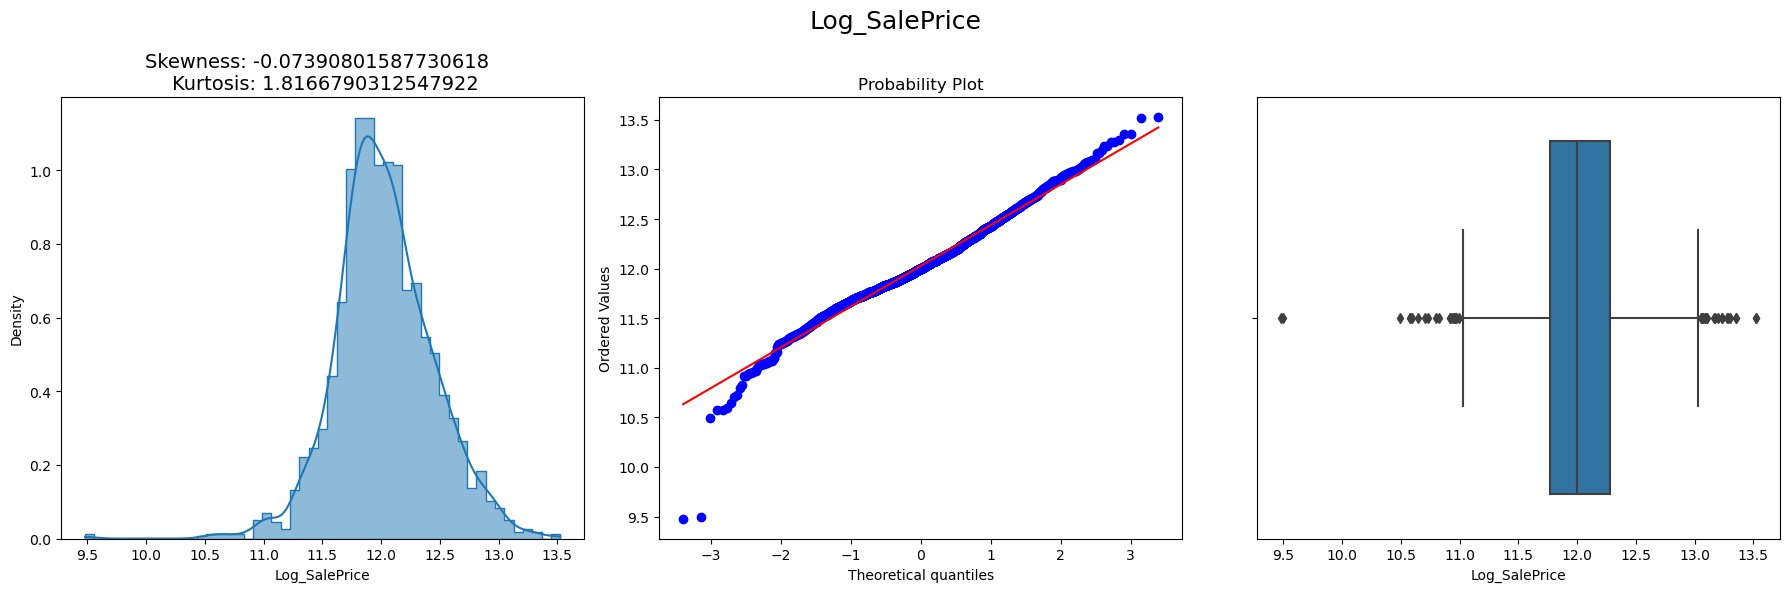

In [27]:
train['Log_SalePrice'] = np.log1p(train.SalePrice)
targe_plot('Log_SalePrice')

In [28]:
#Correlation : dentify which variables are most important in predicting the target variable

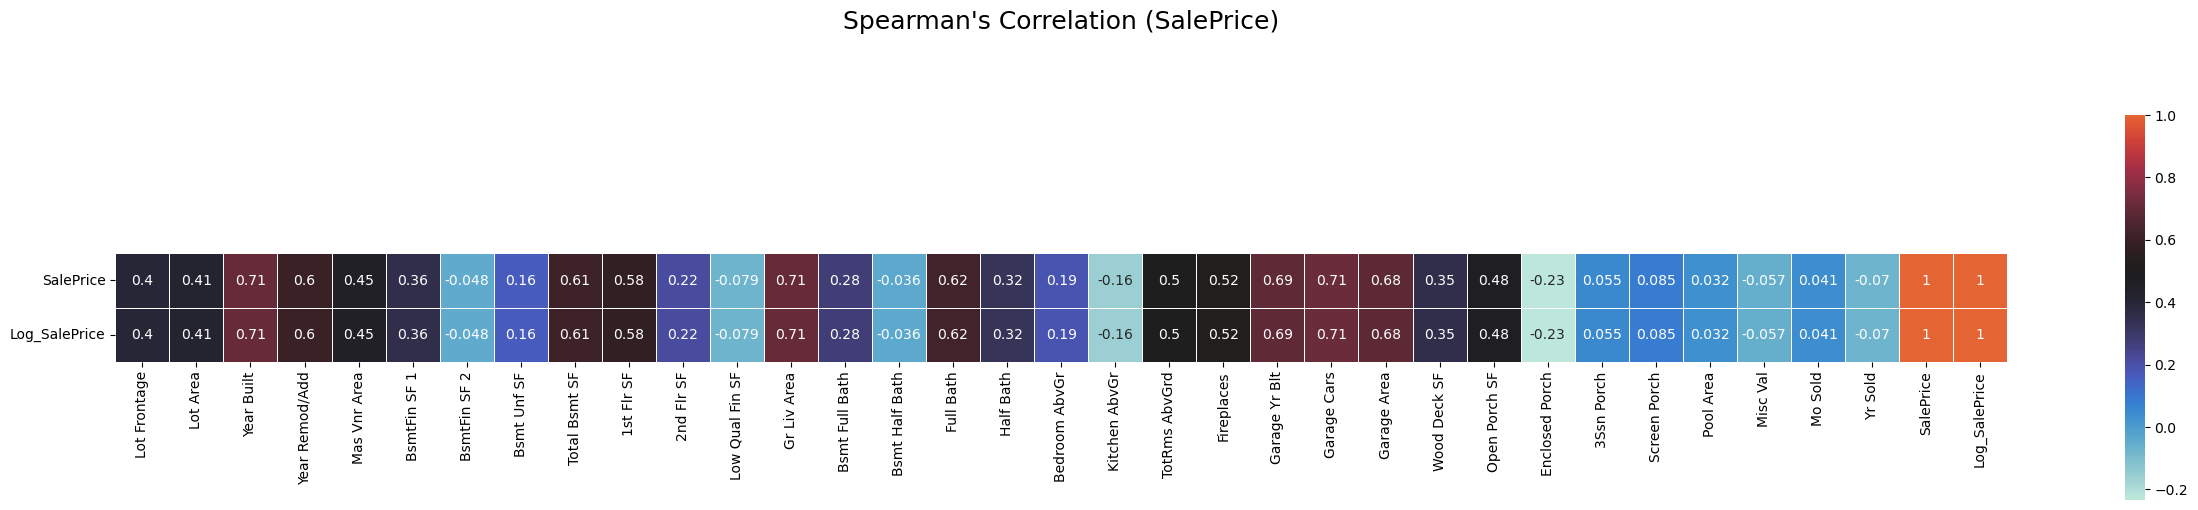

In [29]:
mat_corr=train.corr(method='spearman')[['SalePrice', 'Log_SalePrice']]

plt.figure(figsize=(25,8), dpi=100)

sns.heatmap(mat_corr.T, annot=True, center=0.5, vmax=1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Spearman's Correlation (SalePrice)", fontsize=18, y=3)
plt.tight_layout()
plt.show()


In [33]:
# Numerical Variables with a strong relationship to the target
num_feat_sel = mat_corr[abs(mat_corr.SalePrice)>0.5].index.to_list()
print('Selected Numerical Features: \n\n', num_feat_sel)

Selected Numerical Features: 

 ['Year Built', 'Year Remod/Add', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'SalePrice', 'Log_SalePrice']


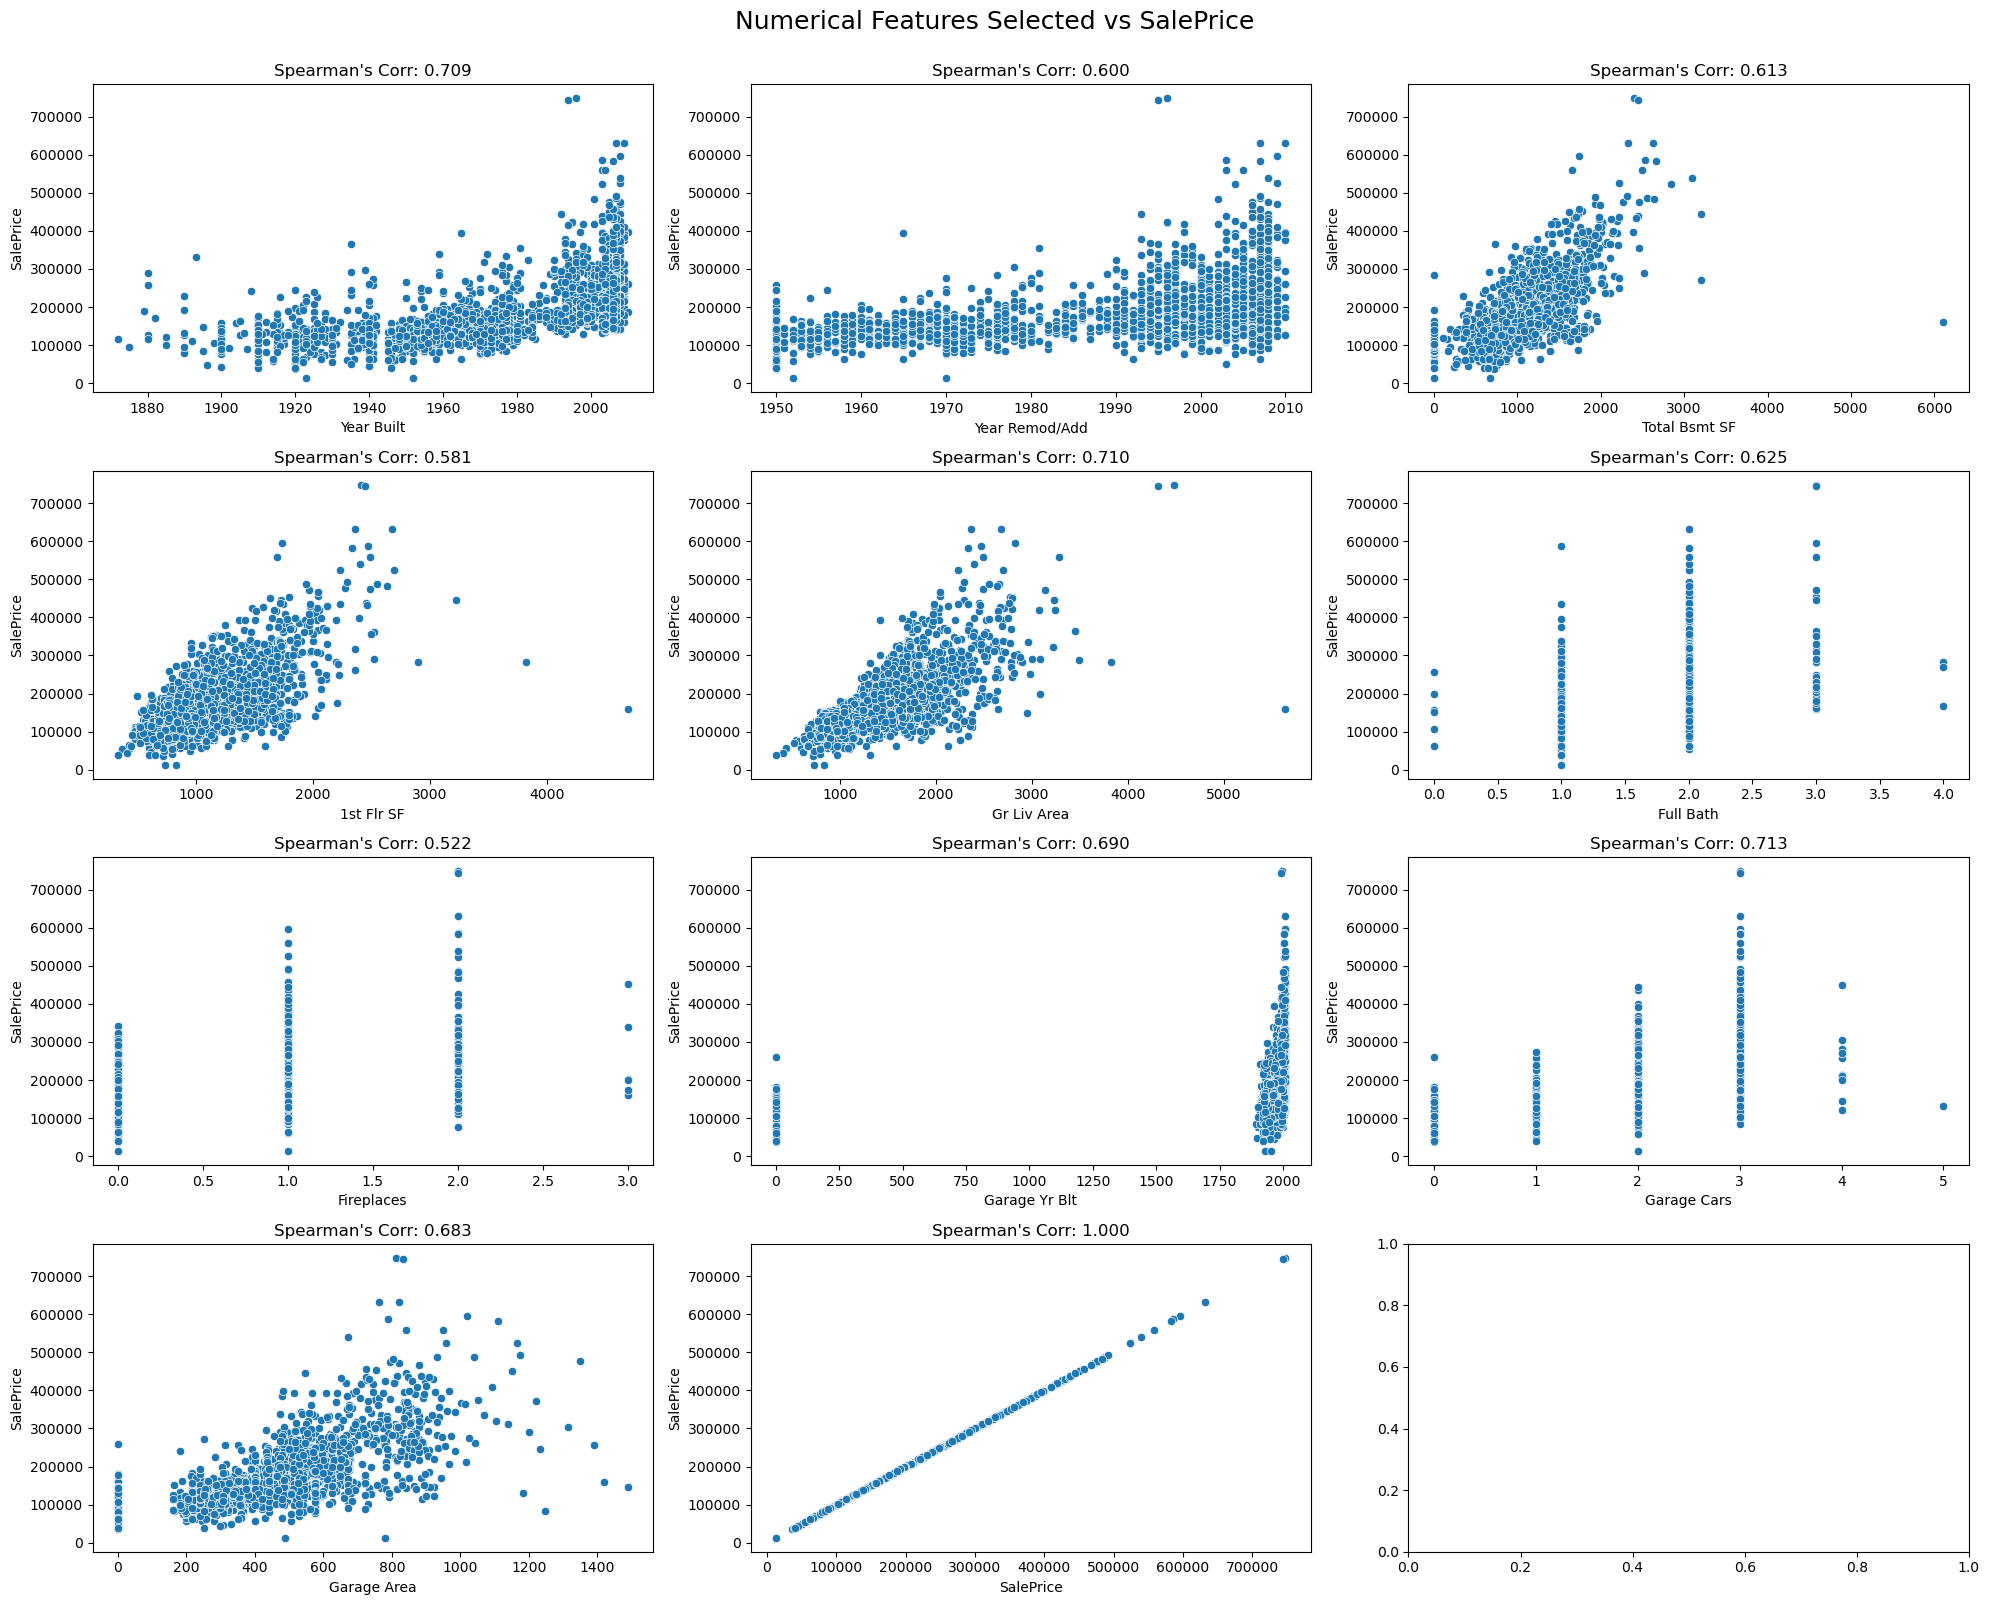

In [34]:
ncols = 3
nrows = round(len(num_feat_sel)/ncols)
fig, ax = plt.subplots(nrows, ncols,figsize=(20,nrows*4), dpi=100)
for idx, col in enumerate(num_feat_sel[:-1]):
    chart = sns.scatterplot(x=col, y='SalePrice', data=train, ax=ax[idx//ncols, idx%ncols])
    chart.set_title(f"Spearman's Corr: {mat_corr.SalePrice[col]:.3f}")

fig.suptitle('Numerical Features Selected vs SalePrice', fontsize=18 , y=1)
fig.tight_layout()
plt.show()

In [37]:
train[train['Gr Liv Area'] >= 5000]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Log_SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1499,60,RL,313.0,63887,Pave,NA,IR3,Bnk,AllPub,Corner,...,Gd,NA,NA,0,1,2008,New,Partial,159700,11.981059


In [38]:
train_orig = train.copy()

# Get rid of outliers in GrLivArea > 5000
train = train[train['Gr Liv Area'] < 5000].copy()
train.reset_index(drop = True, inplace = True)

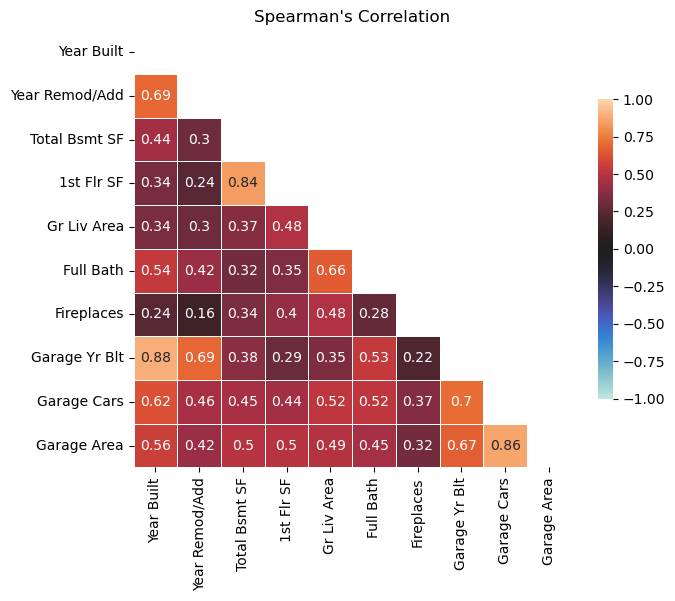

In [40]:
# Spearman's Correlation for the numerical variables previously selected

plt.figure(figsize=(7,7), dpi=100)
mat_corr=train[num_feat_sel[:-2]].corr(method='spearman')

sns.heatmap(mat_corr, annot=True, mask=np.triu(np.ones_like(mat_corr, dtype=bool)), center=0, vmax=1, vmin=-1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Spearman's Correlation", fontsize=12 )
plt.tight_layout()
plt.show()

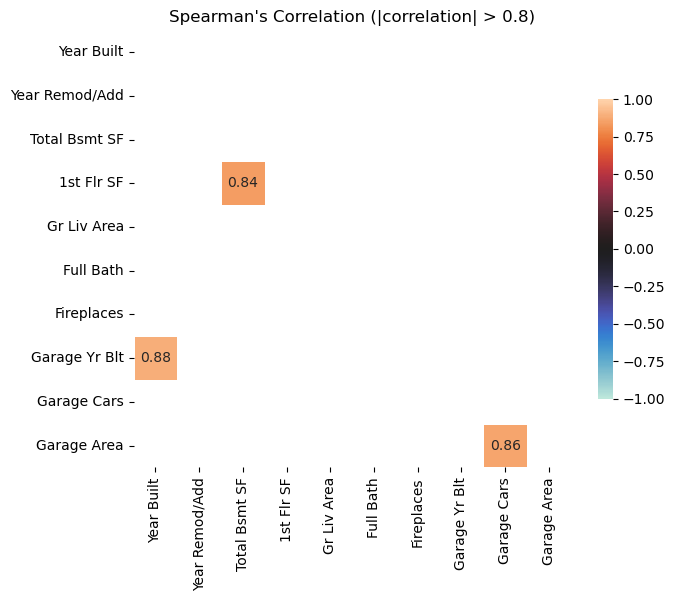

In [59]:
plt.figure(figsize=(7, 7), dpi=100)
# Mask to only display strong correlations (> 0.8)
mask = ~(np.abs(mat_corr) > 0.8) | ~(np.abs(mat_corr) < 1) | np.triu(np.ones_like(mat_corr, dtype=bool))

sns.heatmap(mat_corr, annot=True, mask=mask, center=0, vmax=1, vmin=-1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


plt.title("Spearman's Correlation (|correlation| > 0.8)", fontsize=12)
plt.tight_layout()
plt.show()


In [60]:
#Categorical Features 
anova_feat = train.columns[train.dtypes=='object'].to_list()

anovaStats = []

for var in anova_feat:
    catGrouplist = train.groupby(var).Log_SalePrice.apply(list)
    anovaStats.append([var, *stats.f_oneway(*catGrouplist)])
    
anova_df = pd.DataFrame(anovaStats, columns=['Feature', 'statistic', 'pvalue'])

In [61]:
cat_feat_sel = anova_df[anova_df.pvalue<0.05].sort_values('pvalue').reset_index(drop=True)[:28].Feature
anova_df[anova_df.pvalue<0.05].sort_values('pvalue').reset_index(drop=True)[:28]


,Feature,statistic,pvalue
0,Overall Qual,496.164626,0.000000e+00
1,Neighborhood,114.251498,0.000000e+00
2,Bsmt Qual,403.123973,3.179022e-299
3,Exter Qual,632.480204,6.964321e-289
4,Kitchen Qual,423.702683,2.005128e-264
5,Garage Finish,381.280303,9.975013e-196
6,Foundation,209.666890,5.859455e-180
7,Garage Type,159.706084,6.864516e-166
8,Fireplace Qu,175.638070,4.026445e-155
9,MS SubClass,63.615678,2.153110e-148


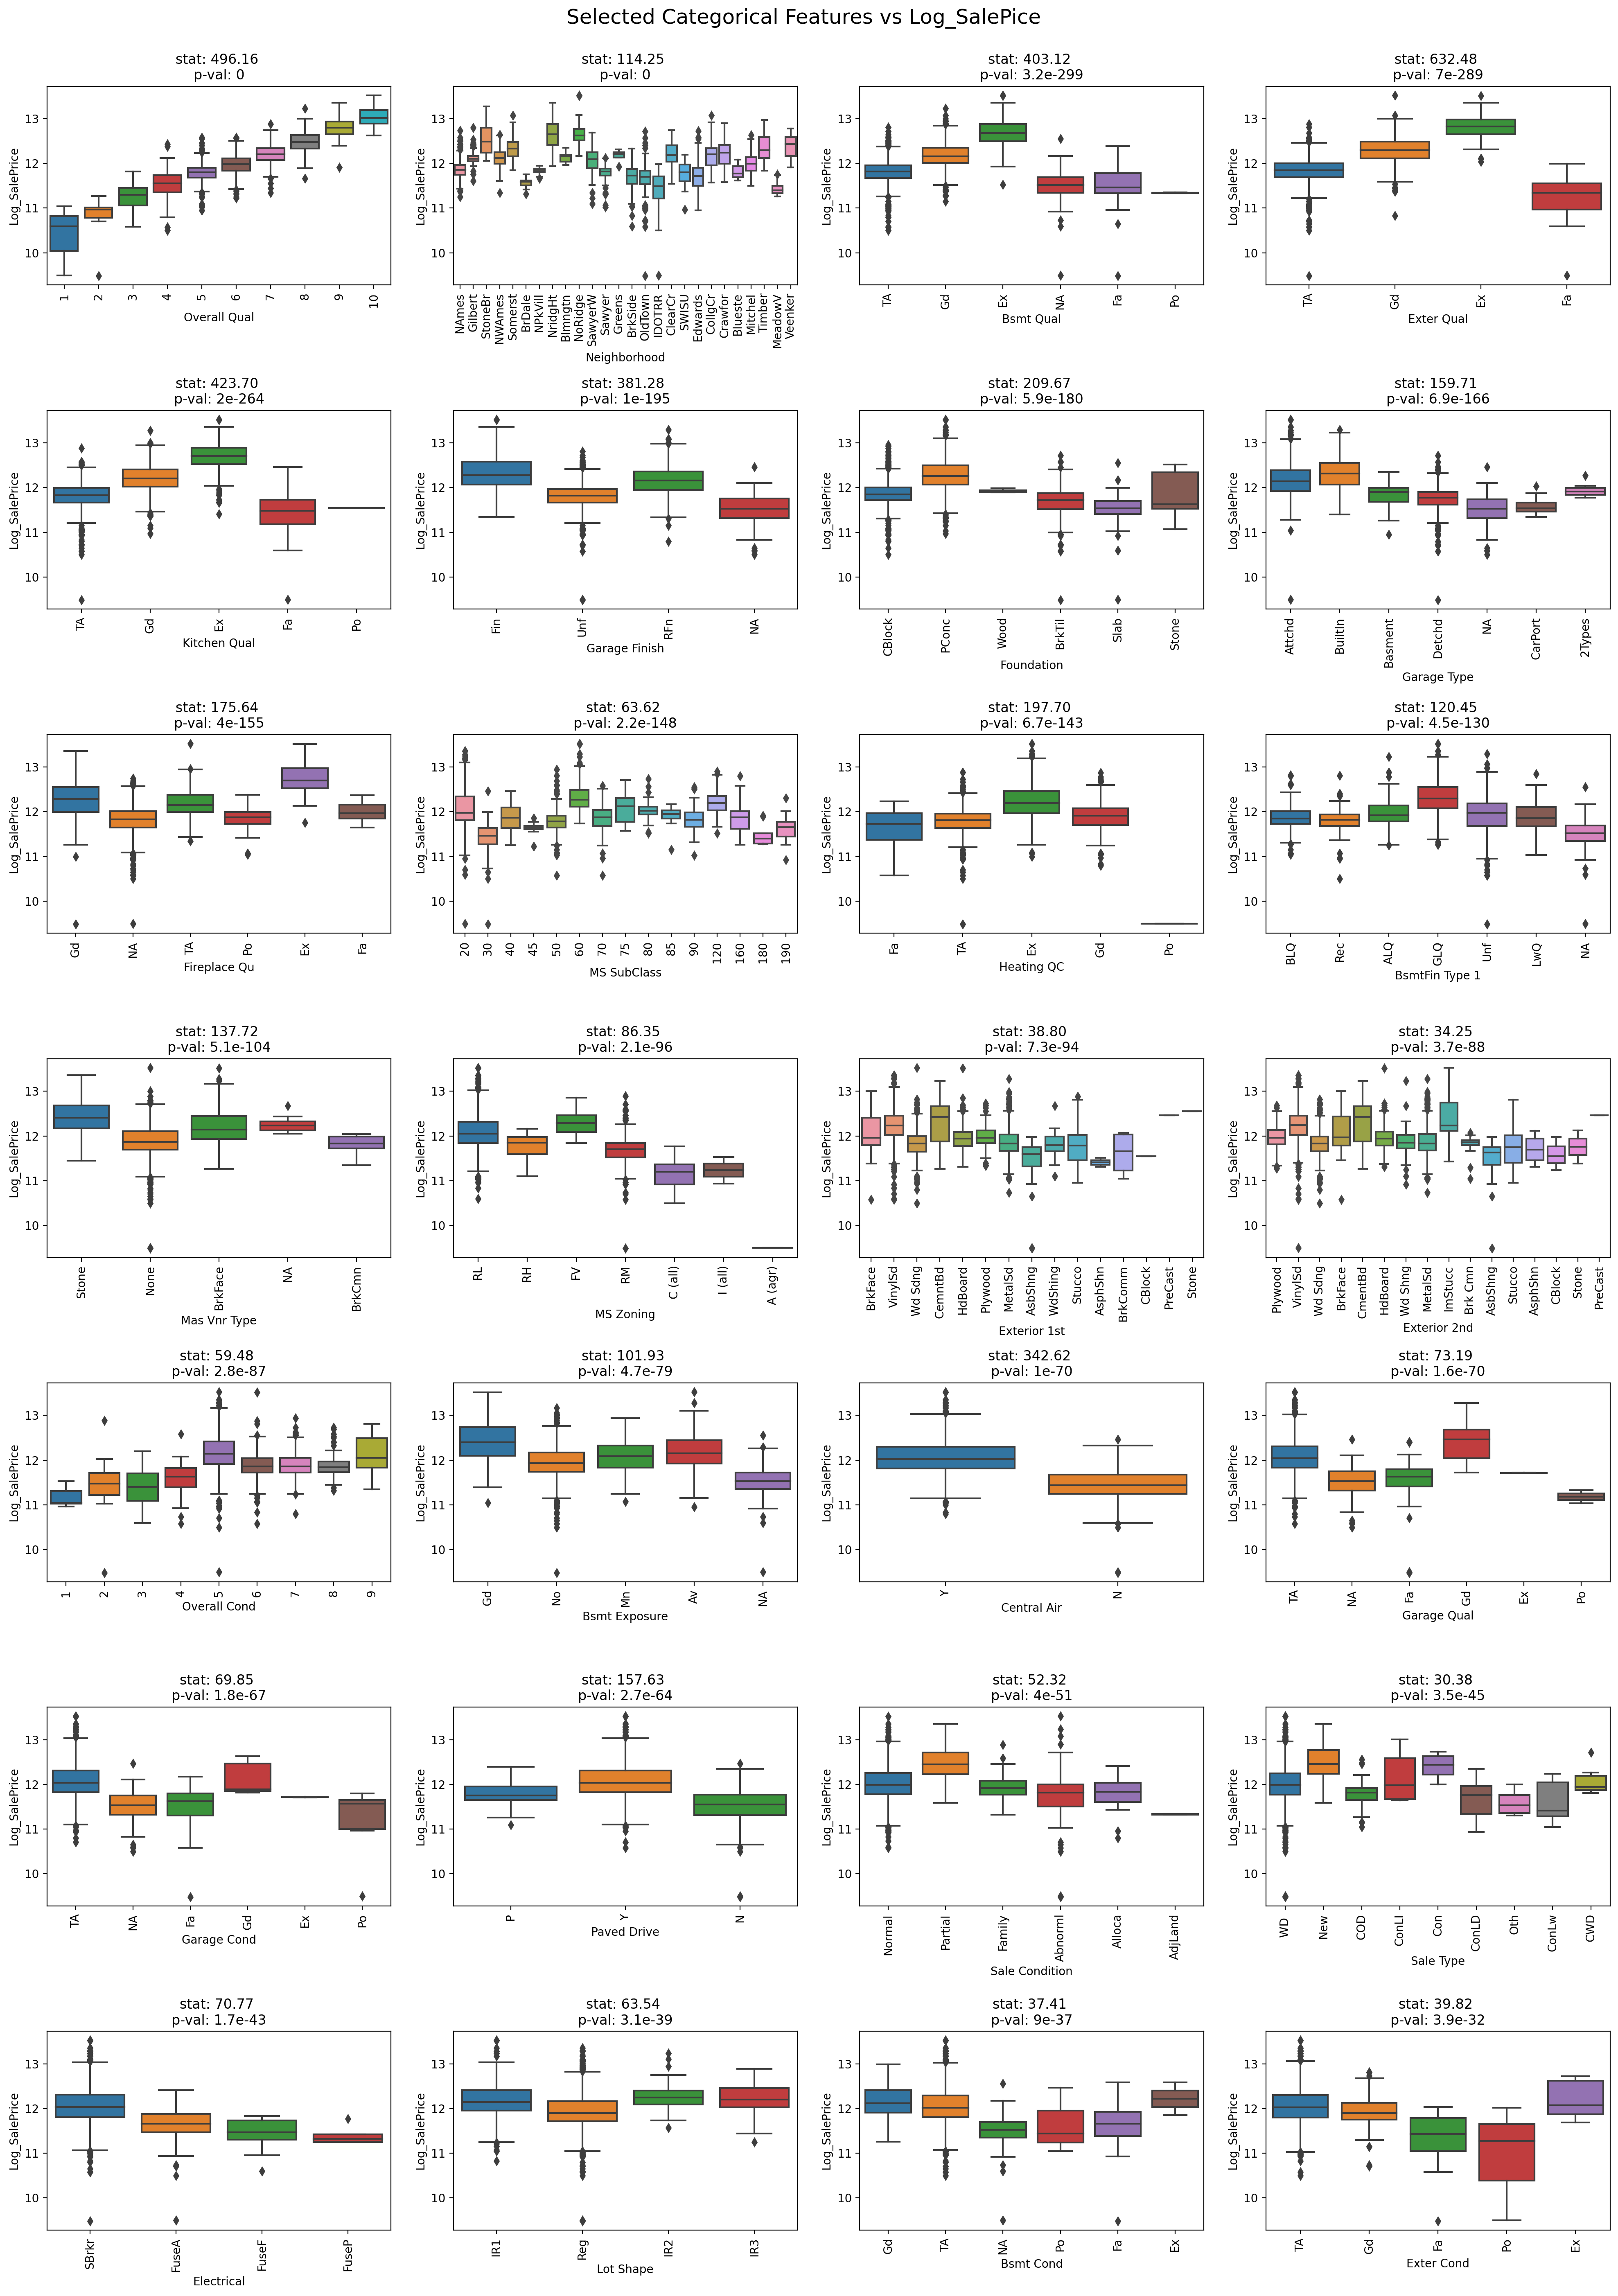

In [65]:
ncols = 4 
nrows = round(len(cat_feat_sel)/ncols)

fig, ax = plt.subplots(nrows, ncols,figsize=(20,nrows*4), dpi=200)

for idx, col in enumerate(cat_feat_sel):
    chart=sns.boxplot(x=col, y='Log_SalePrice', data=train, ax=ax[idx//ncols, idx%ncols])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    arr = anova_df.loc[anova_df.Feature==col, ['statistic', 'pvalue']].values[0]
    chart.set_title(f"stat: {arr[0]:.2f} \np-val: {arr[1]:.2g}")

fig.suptitle('Selected Categorical Features vs Log_SalePice', fontsize=18 , y=1)
plt.tight_layout()
plt.show()

In [66]:
# Assiging column names to row indexs 
chi2matrix=pd.DataFrame(train[cat_feat_sel],columns=cat_feat_sel,index=cat_feat_sel)

for icol in cat_feat_sel: # Outer loop
    for jcol in cat_feat_sel: # inner loop
        
        # Converting to cross tab as for CHi-square test we have to first convert variables into contigency table
        crosstab=pd.crosstab(train[icol],train[jcol])
      
        #Getting p-value and other usefull information
        stat,p,dof,expected = stats.chi2_contingency(crosstab)
        
        # Rounding very small p-values to zero
        chi2matrix.loc[icol,jcol]= p
        
        # As mentioned above Expected frequencies should be at least 5 for the majority (80%) of the cells.
        # Here we are checking expected frequency of each group
        cntexpected=expected[expected<5].size
        #Getting percentage 
        perexpected=((expected.size-cntexpected)/expected.size)*100

        if perexpected<20:
            chi2matrix.loc[icol,jcol]=1
        if icol==jcol:
             chi2matrix.loc[icol,jcol]=0.00

        

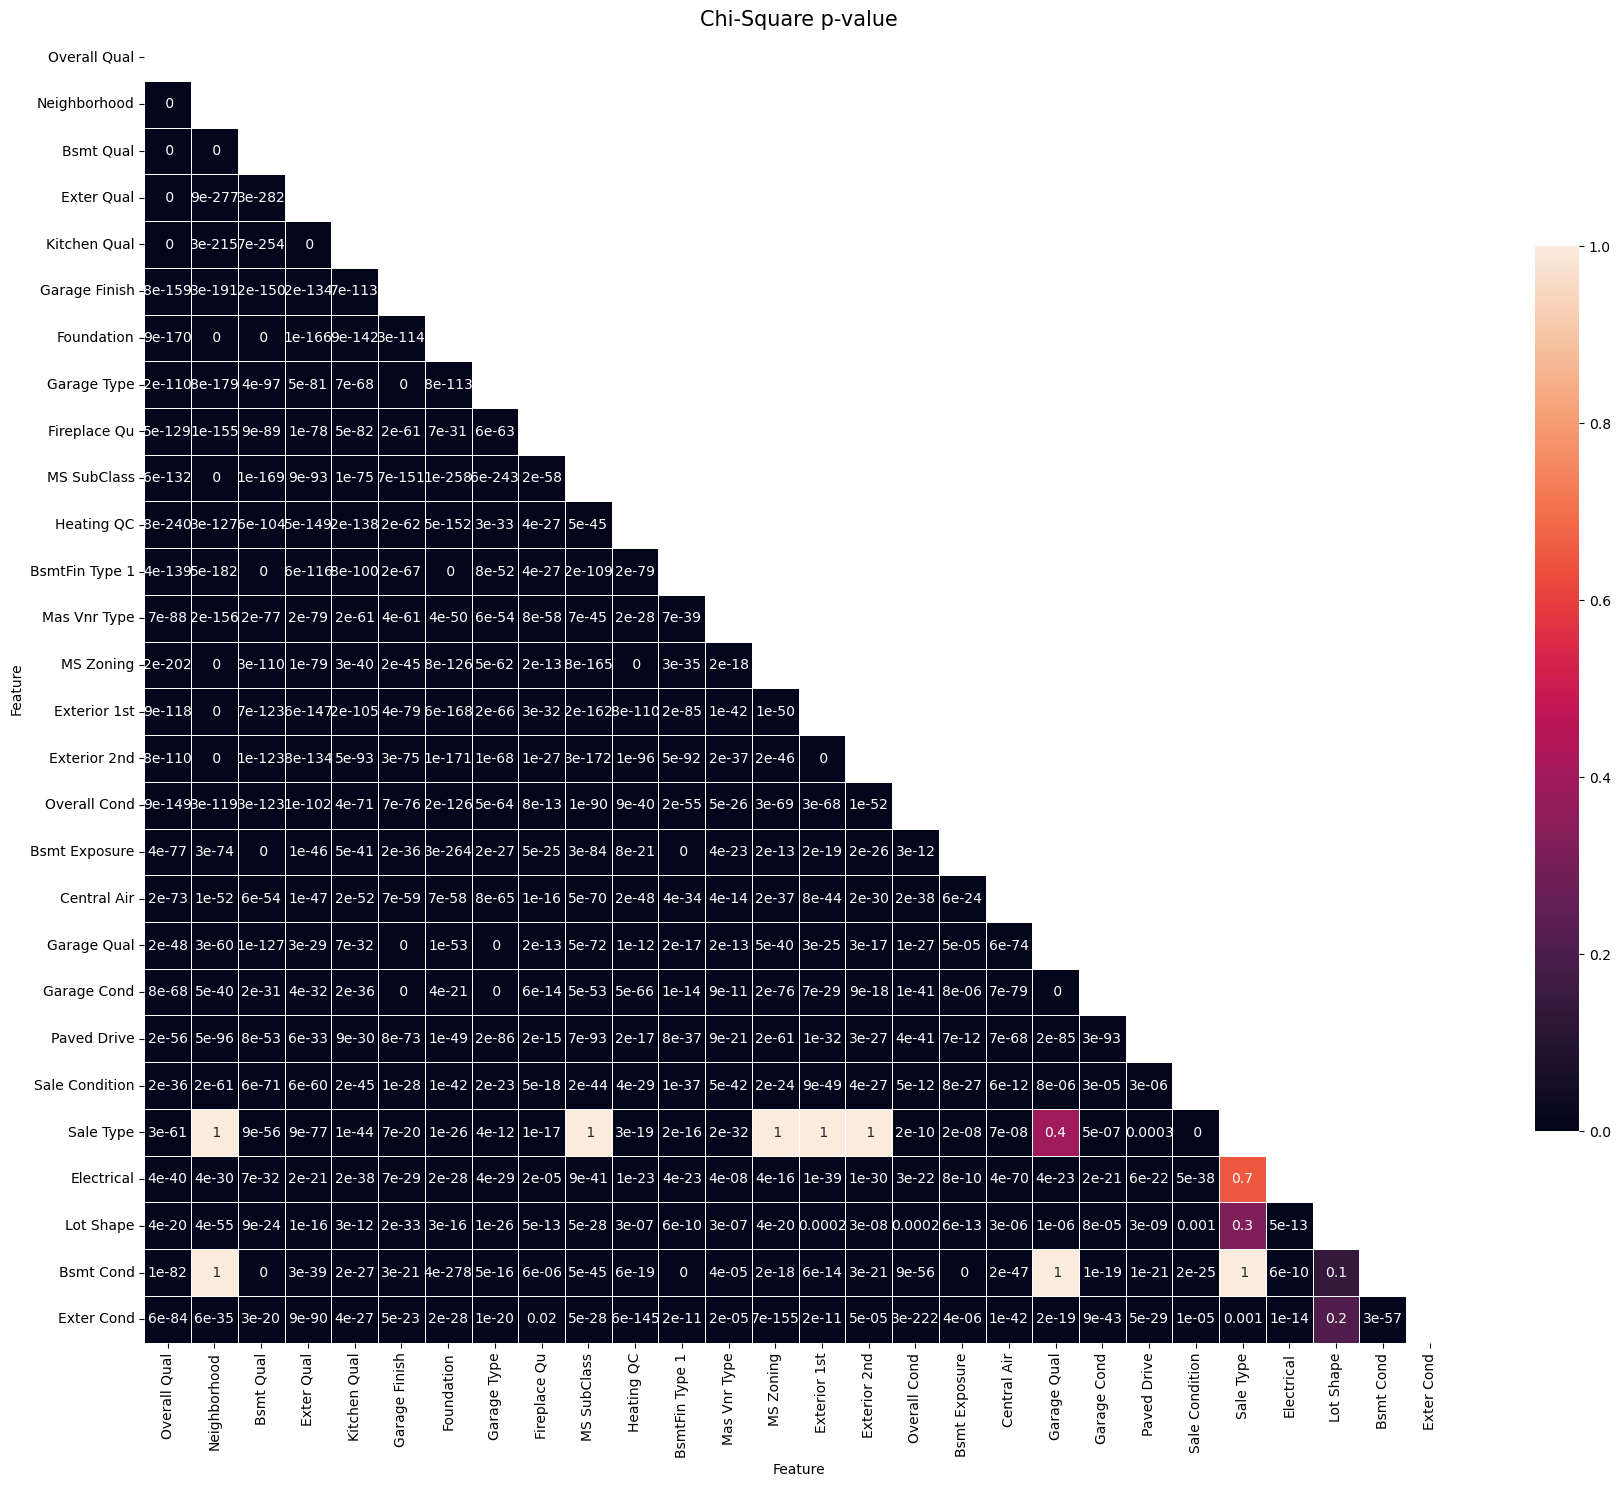

In [71]:
plt.figure(figsize=(18,18), dpi=100)

chi2matrix = chi2matrix.astype(float)

sns.heatmap(chi2matrix, 
            annot=True, fmt='2.0g', 
            mask=np.triu(np.ones_like(chi2matrix, dtype=bool)), 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Chi-Square p-value", fontsize=15 )
plt.tight_layout()
plt.show()

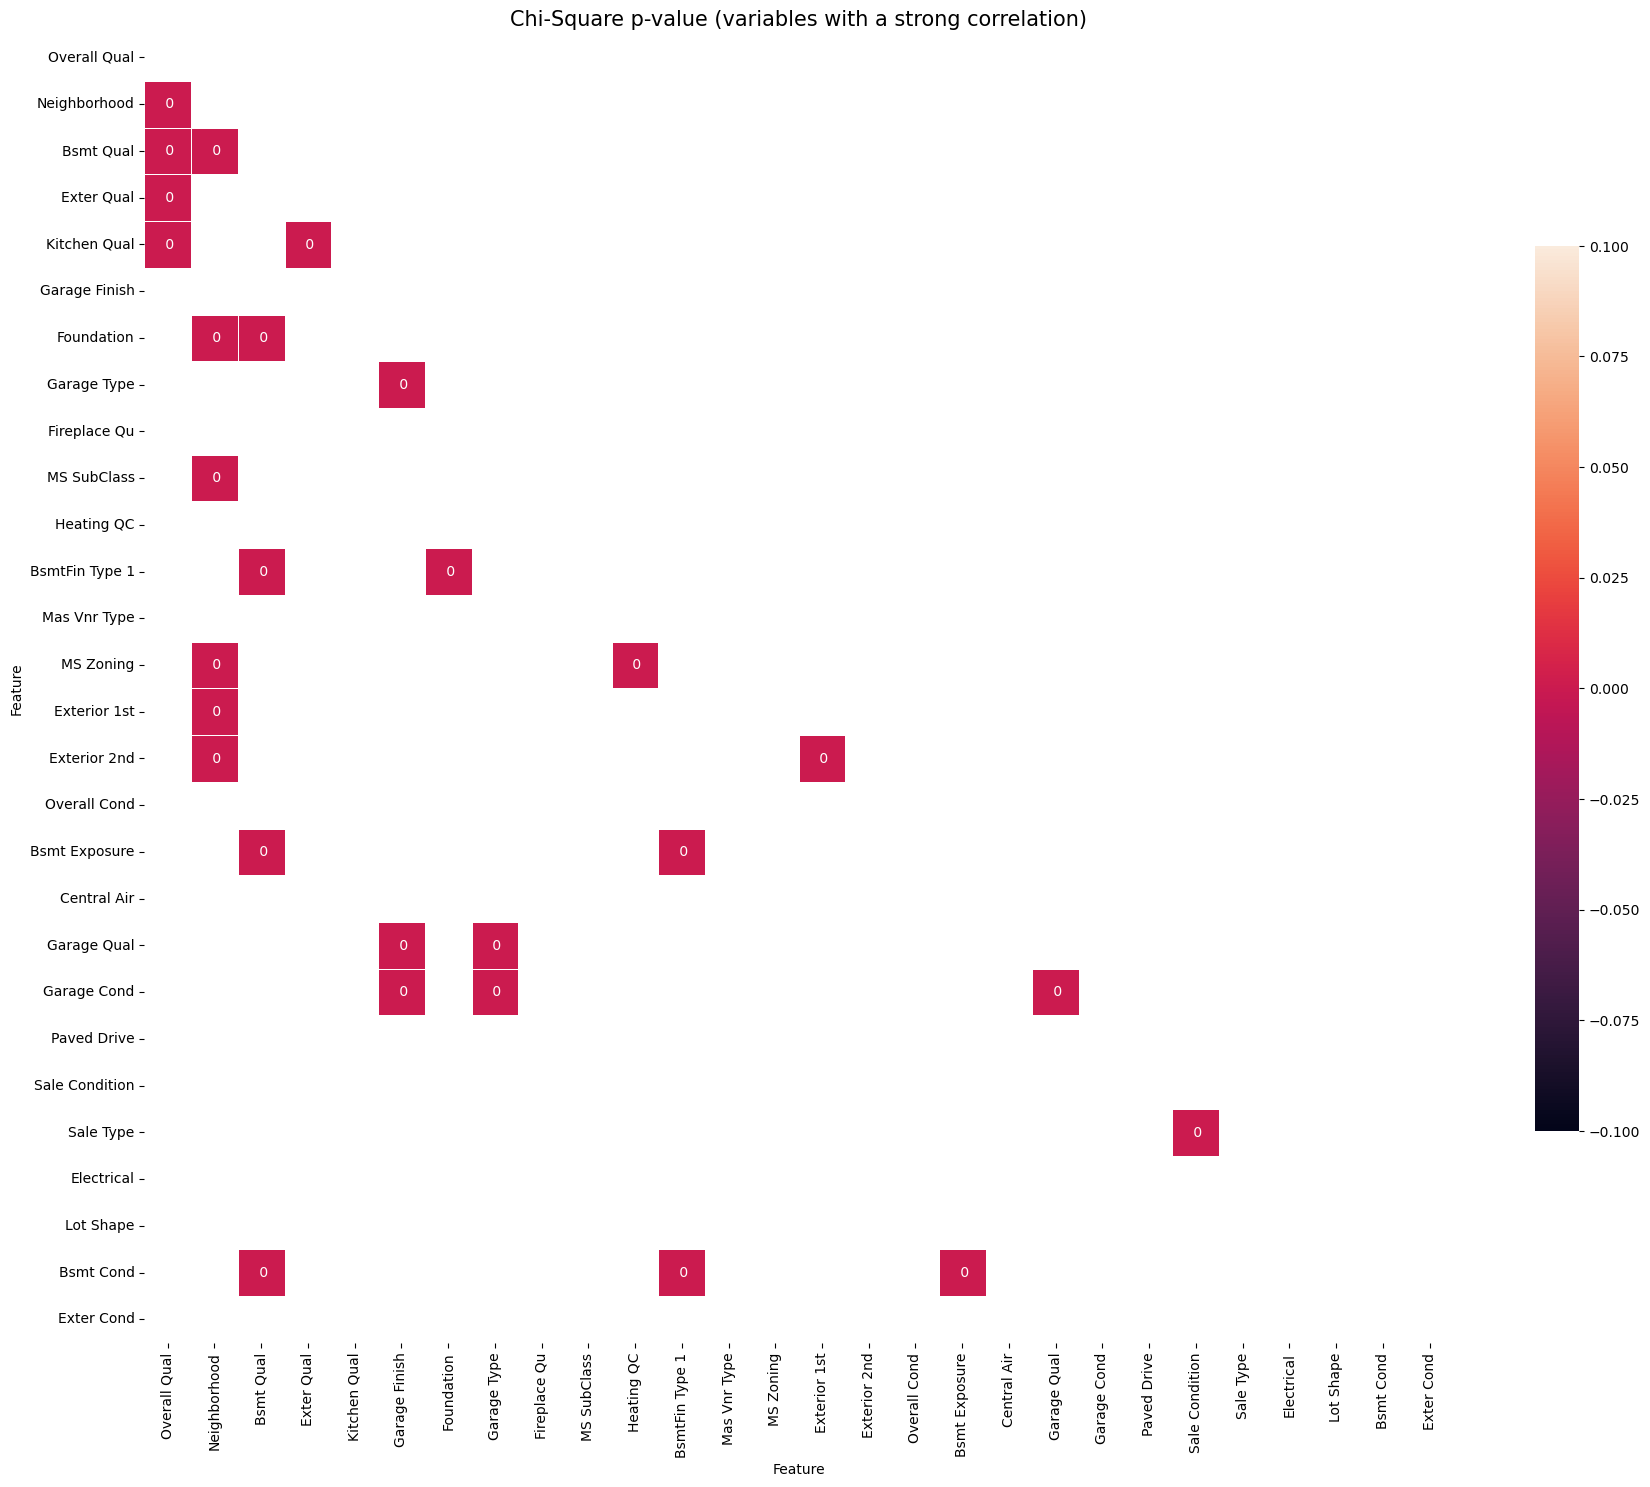

In [74]:
plt.figure(figsize=(18,18), dpi=100)

chi2matrix = chi2matrix.astype(float)

mask = ~(np.abs(chi2matrix) ==0) | np.triu(np.ones_like(chi2matrix, dtype=bool))

sns.heatmap(chi2matrix, 
            annot=True, fmt='2.0g', 
            mask=mask, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Chi-Square p-value (variables with a strong correlation)", fontsize=15 )
plt.tight_layout()
plt.show()

In [75]:
#Feature Selection & Encoding